# Ejercicio Regresión Lineal - Salarios

En este caso, tenemos un dataset con información sobre salarios (https://www.kaggle.com/datasets/ravitejakotharu/salary-datacsv) disponible con las siguientes columnas:
* YearsExperience
* Salary

Así que, nuestro objetivo es predecir, en base a *n* años de experiencia el salario. Realiza los siguientes pasos:
* Cargar los datos 
* EDA
* Obtener una visualización sobre YearsExperience ~ Salary
* Construir los conjuntos X e Y
* Obtener los cojuntos de Train y Test
* Implementar un modelo de regresión lineal entre X_Train e Y_train
* Mostrar las métricas de R2 y MSE
* Visualizar las predicciones del modelo

## Solución

In [1]:
# * Cargar los datos 
import pandas as pd

In [4]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
# * EDA
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
import matplotlib.pyplot as plt

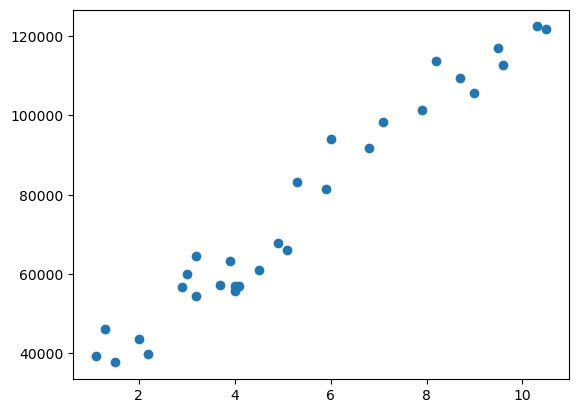

In [9]:
plt.scatter(df.YearsExperience, df.Salary)
plt.show()

In [10]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [11]:
import seaborn as sns

<Axes: xlabel='YearsExperience'>

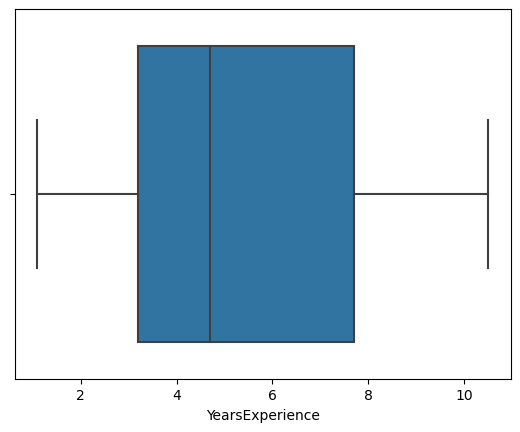

In [12]:
sns.boxplot(data = df,
           x = "YearsExperience")

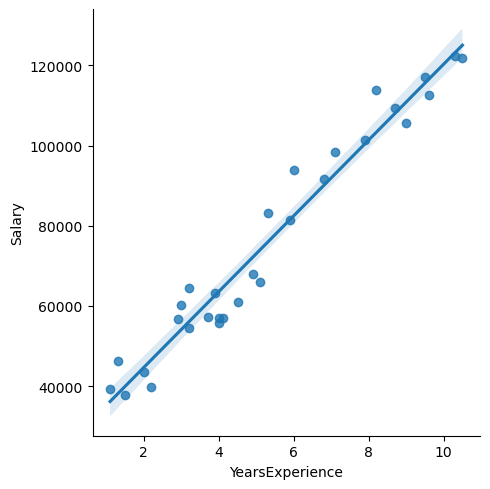

In [17]:
# * Obtener una visualización sobre YearsExperience ~ Salary

sns.lmplot(data = df, 
           x = "YearsExperience",
           y = "Salary")



In [18]:
# * Construir los conjuntos X e Y

X = df.YearsExperience.values
Y = df.Salary.values

In [32]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [20]:
# * Obtener los cojuntos de Train y Test
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [27]:
X_train = X_train.reshape(-1, 1)
X_test  = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test  = y_test.reshape(-1, 1)

print("----X----")
print(X_train.shape)
print(X_test.shape)
print("----Y----")
print(y_train.shape)
print(y_test.shape)

----X----
(24, 1)
(6, 1)
----Y----
(24, 1)
(6, 1)


In [28]:
# * Implementar un modelo de regresión lineal entre X_Train e Y_train

from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

In [29]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [33]:
# * Mostrar las métricas de R2 y MSE

from sklearn.metrics import mean_squared_error, r2_score

# A los datos nuevos de test... .reshape(-1, 1)
# LO MISMO QUE EN TRAIN
y_pred = reg_model.predict(X_test)

In [36]:
print("El error cuadrático medio es: ", round(mean_squared_error(y_test, y_pred),2))
print("El coeficiente de determinación R2 es: ", round(r2_score(y_test, y_pred),2))

El error cuadrático medio es:  52073444.02
El coeficiente de determinación R2 es:  0.92


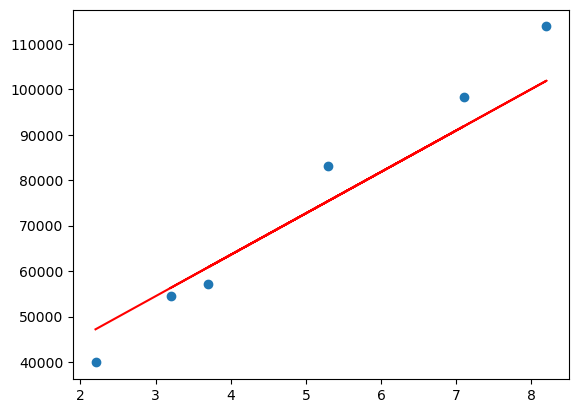

In [40]:
# * Visualizar las predicciones del modelo

# Representamos el ajuste (rojo) y la recta Y = beta*x (verde)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()